<a href="https://colab.research.google.com/github/carolyn0515/DS-ML/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%88%98%EC%9A%94%EB%9F%89_%EC%98%88%EC%B8%A1%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [ ]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [ ]:
# # 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'NanumGothic.ttf' in f]
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

In [ ]:
# # 위에 나온 경로를 가져오기(똑같으면 바로 실행하시고 다르면 위에 내용을 복붙해주세요!)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [ ]:
from IPython.display import set_matplotlib_formats

## Windows의 한글 폰트 설정
plt.rc('font', family='NanumGothic')

## Mac의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

<ipython-input-11-a3481114920e>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib_inline.backend_inline import set_matplotlib_formats
!pip install koreanize_matplotlib
import koreanize_matplotlib
# 캐시 초기화
fm._load_fontmanager()  # Matplotlib이 폰트를 다시 로드하게 함

# NanumGothic 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

# 한글이 깨지지 않도록 설정
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')

print(f"설정된 폰트: {font_name}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 84.5 MB/s eta 0:00:00
설정된 폰트: NanumGothic


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

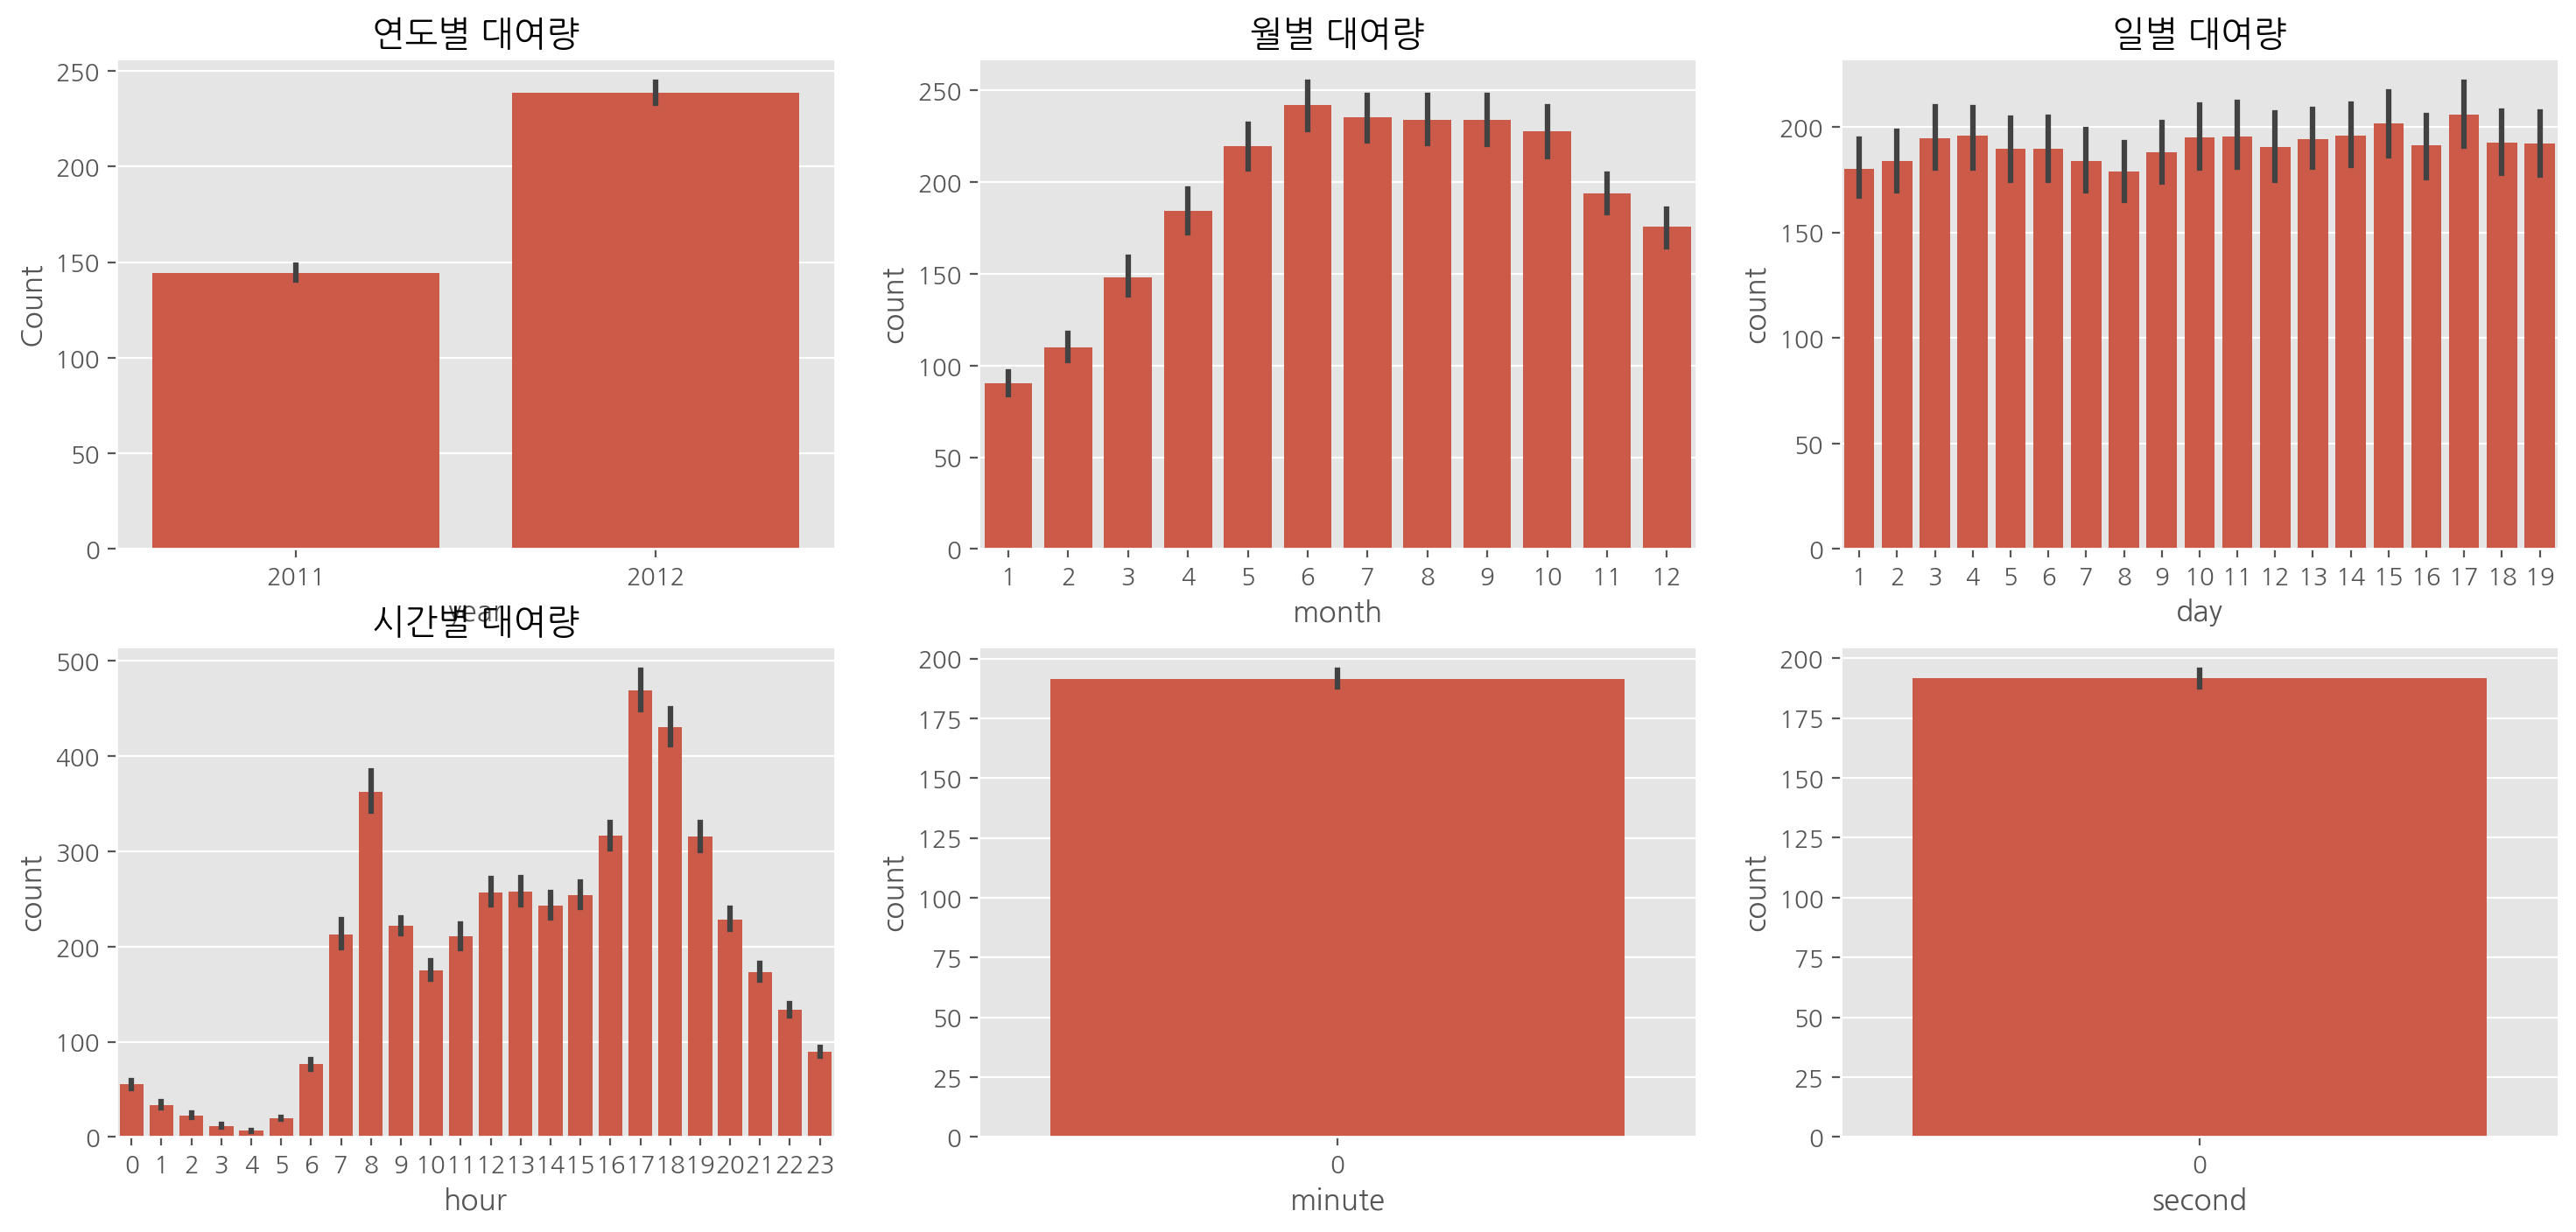

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

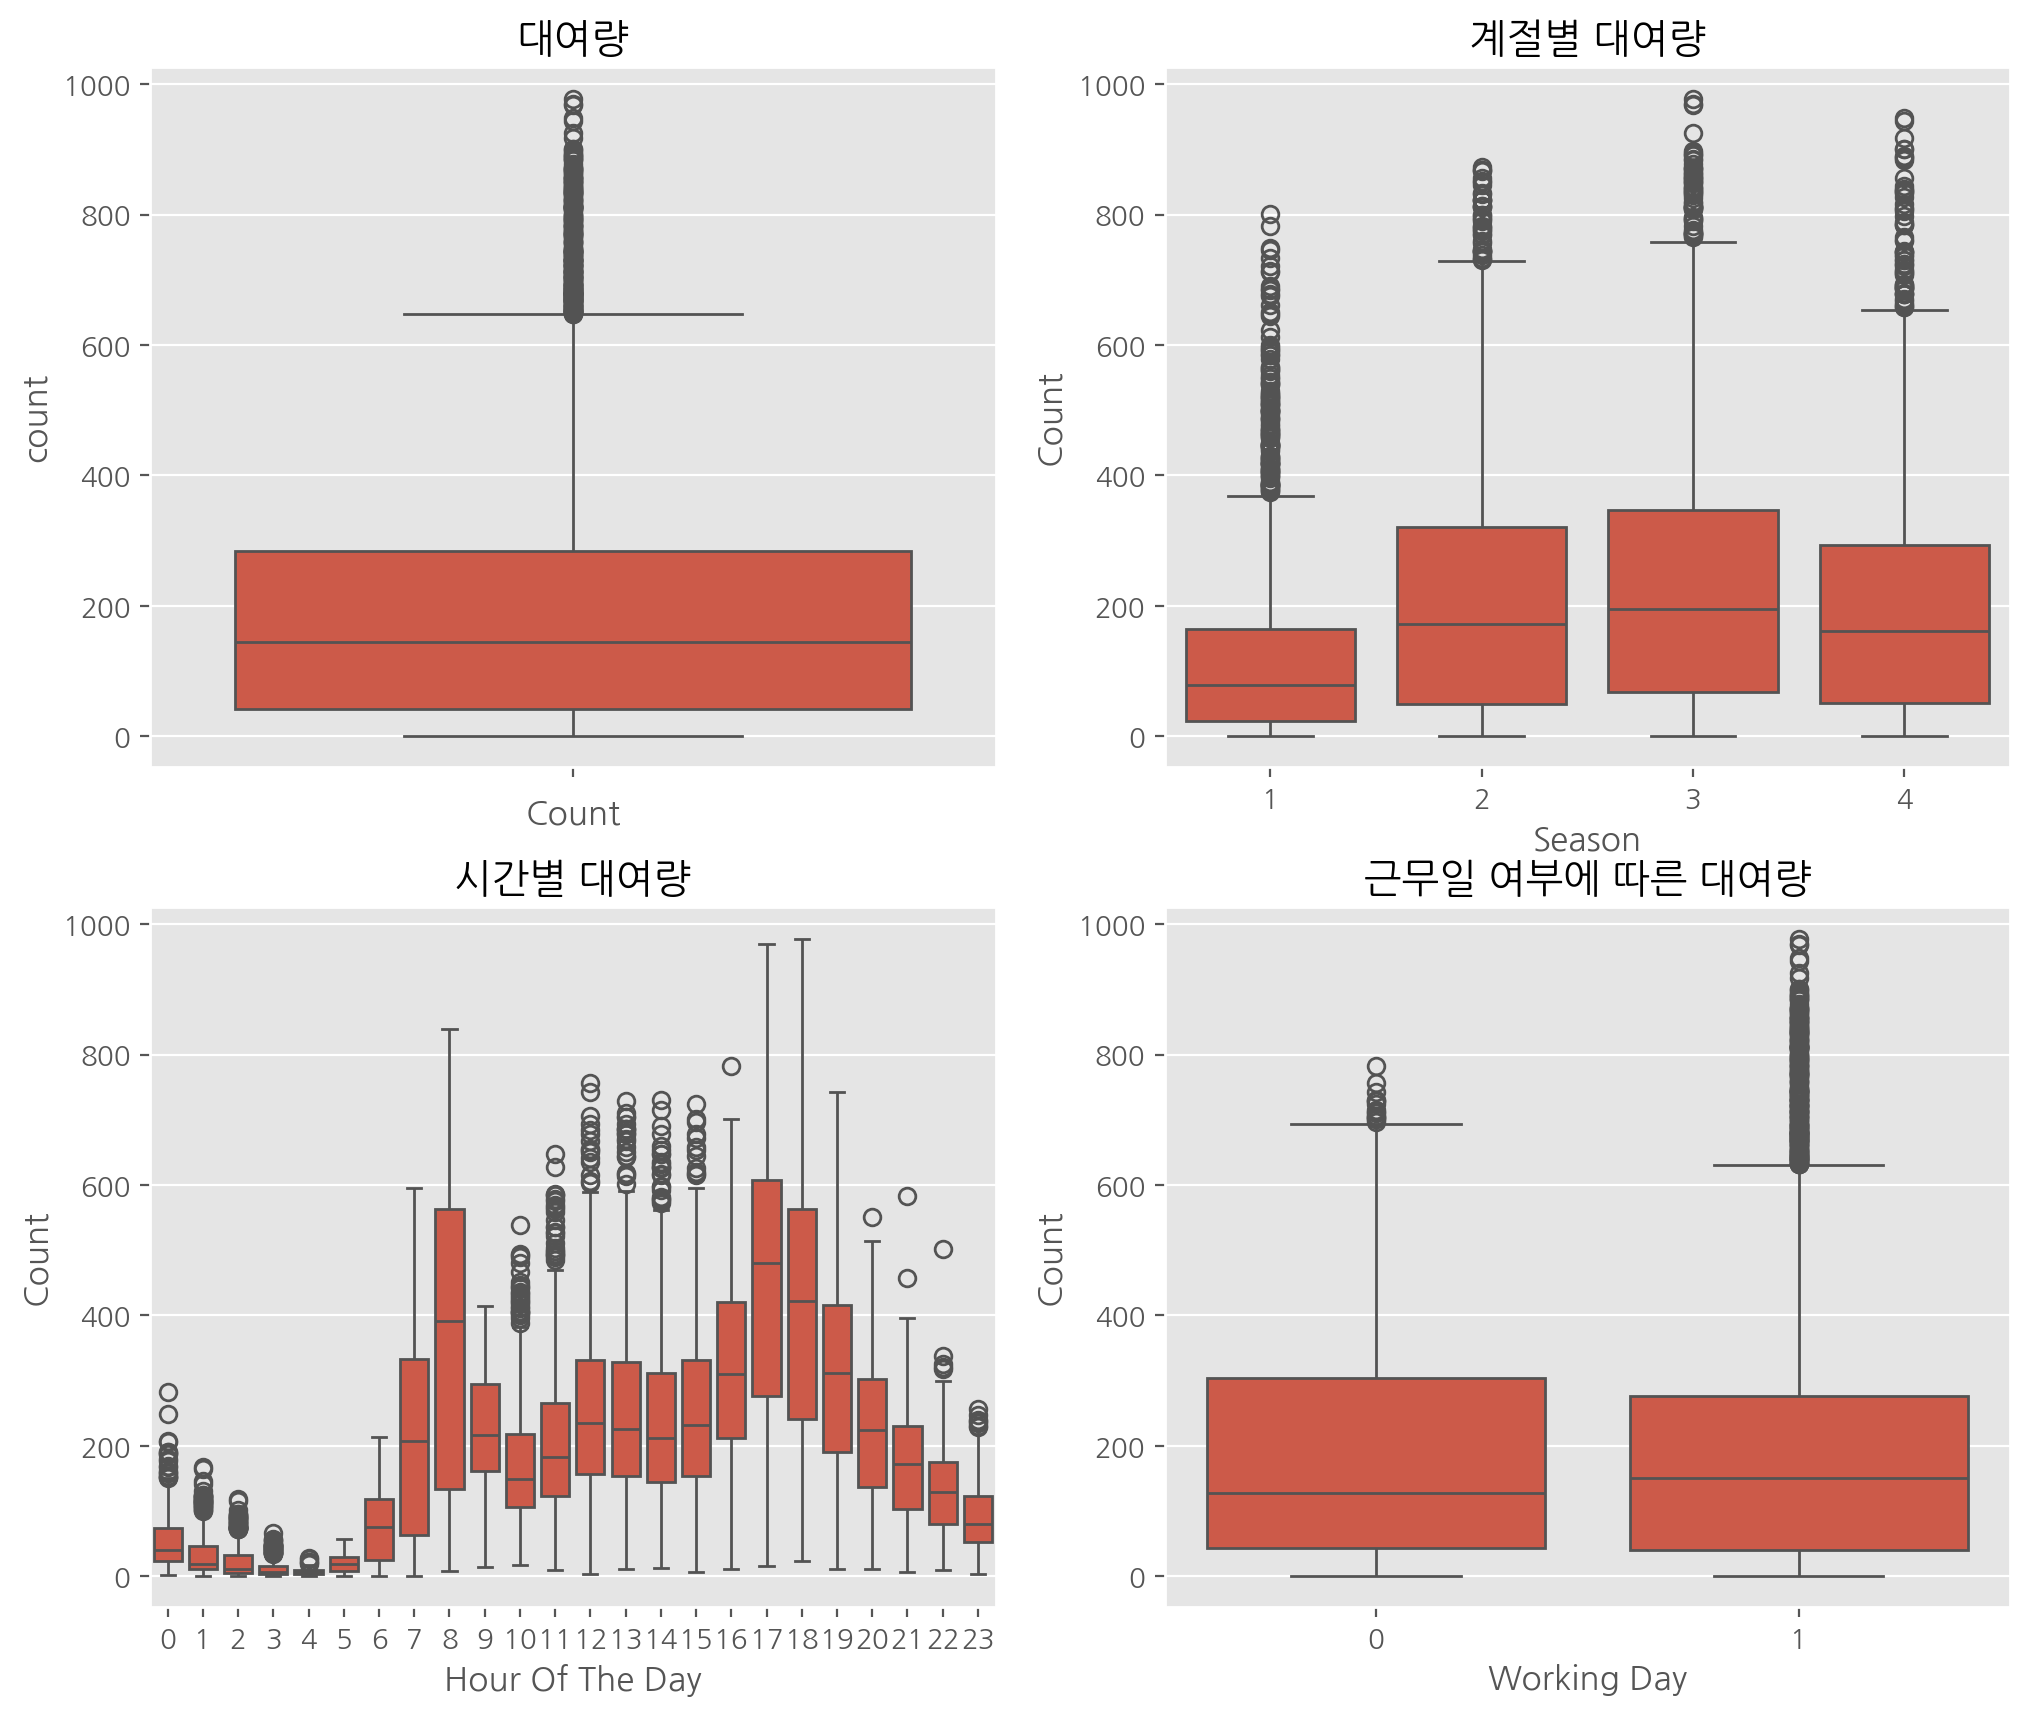

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data = train, y="count", orient = "v", ax=axes[0][0])
sns.boxplot(data = train, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data = train, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data = train, y="count", x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(xlabel='Count', title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count', title="계절별 대여량")
axes[1][0].set(xlabel="Hour Of The Day", ylabel='Count', title="시간별 대여량")
axes[1][1].set(xlabel="Working Day", ylabel='Count', title="근무일 여부에 따른 대여량")

In [ ]:
train["dayofweek"]=train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [ ]:
train["dayofweek"].value_counts()

,count
dayofweek,
5,1584
6,1579
3,1553
0,1551
2,1551
1,1539
4,1529


<Axes: xlabel='hour', ylabel='count'>

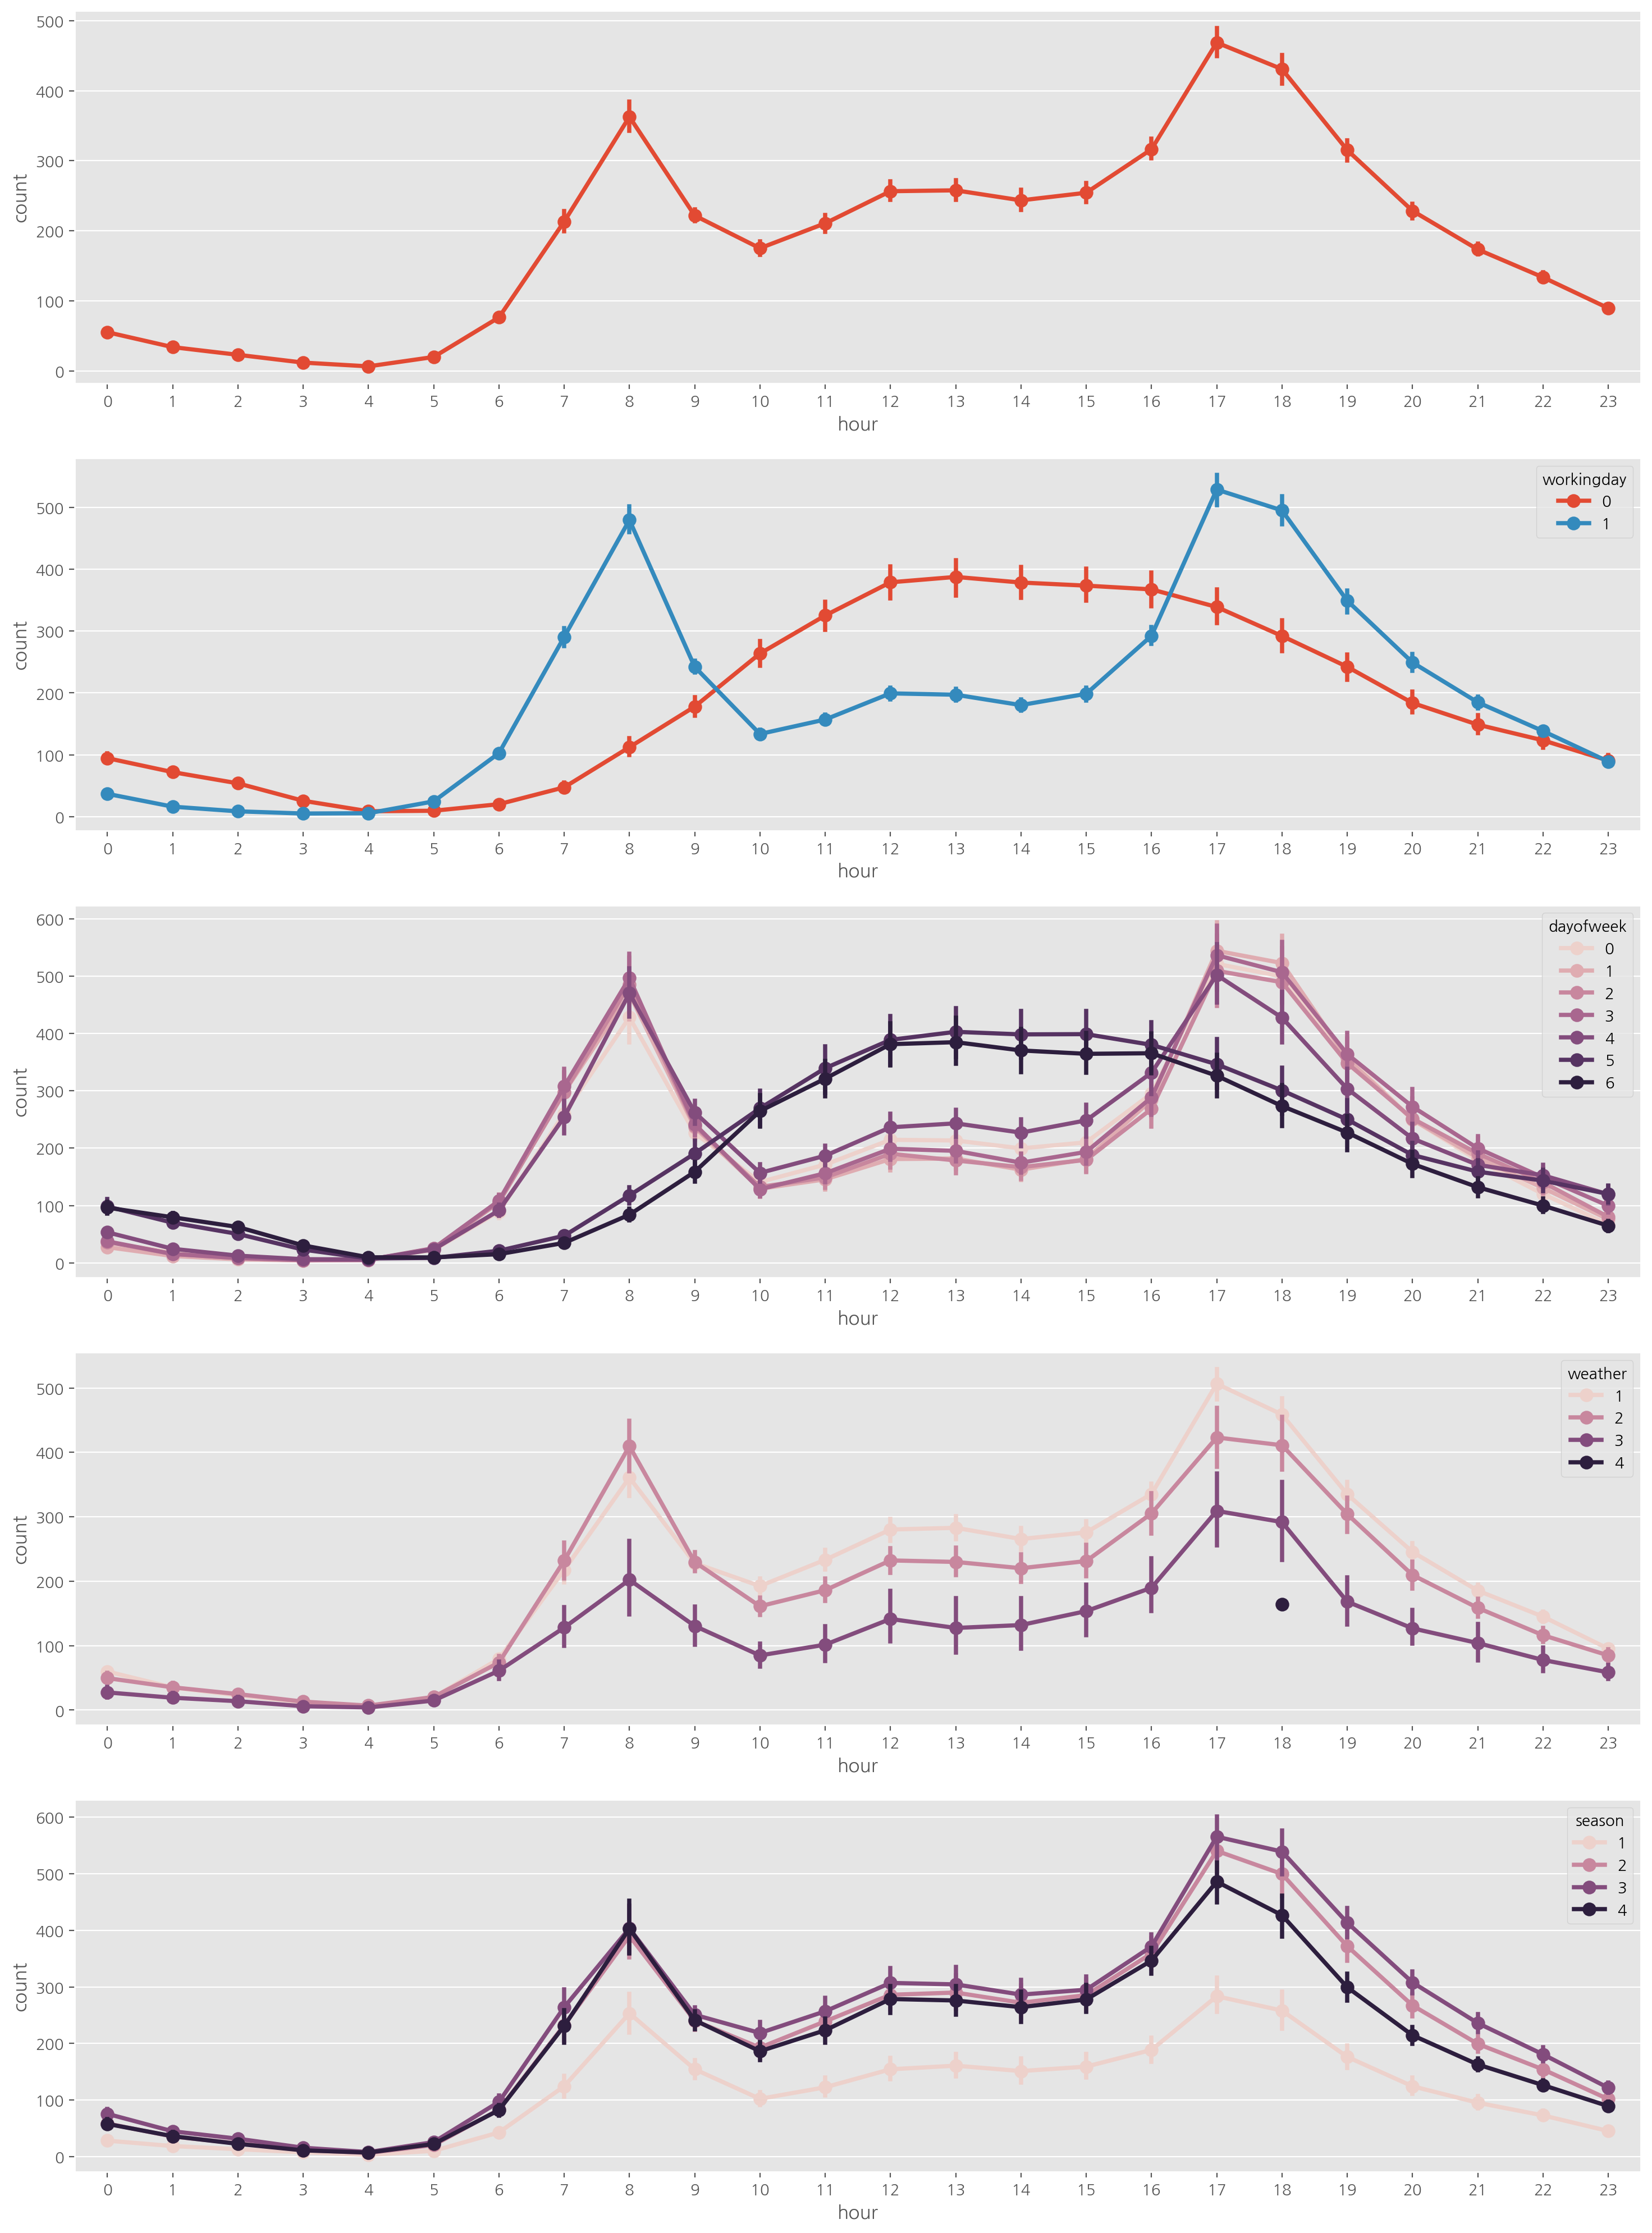

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [ ]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<Axes: >

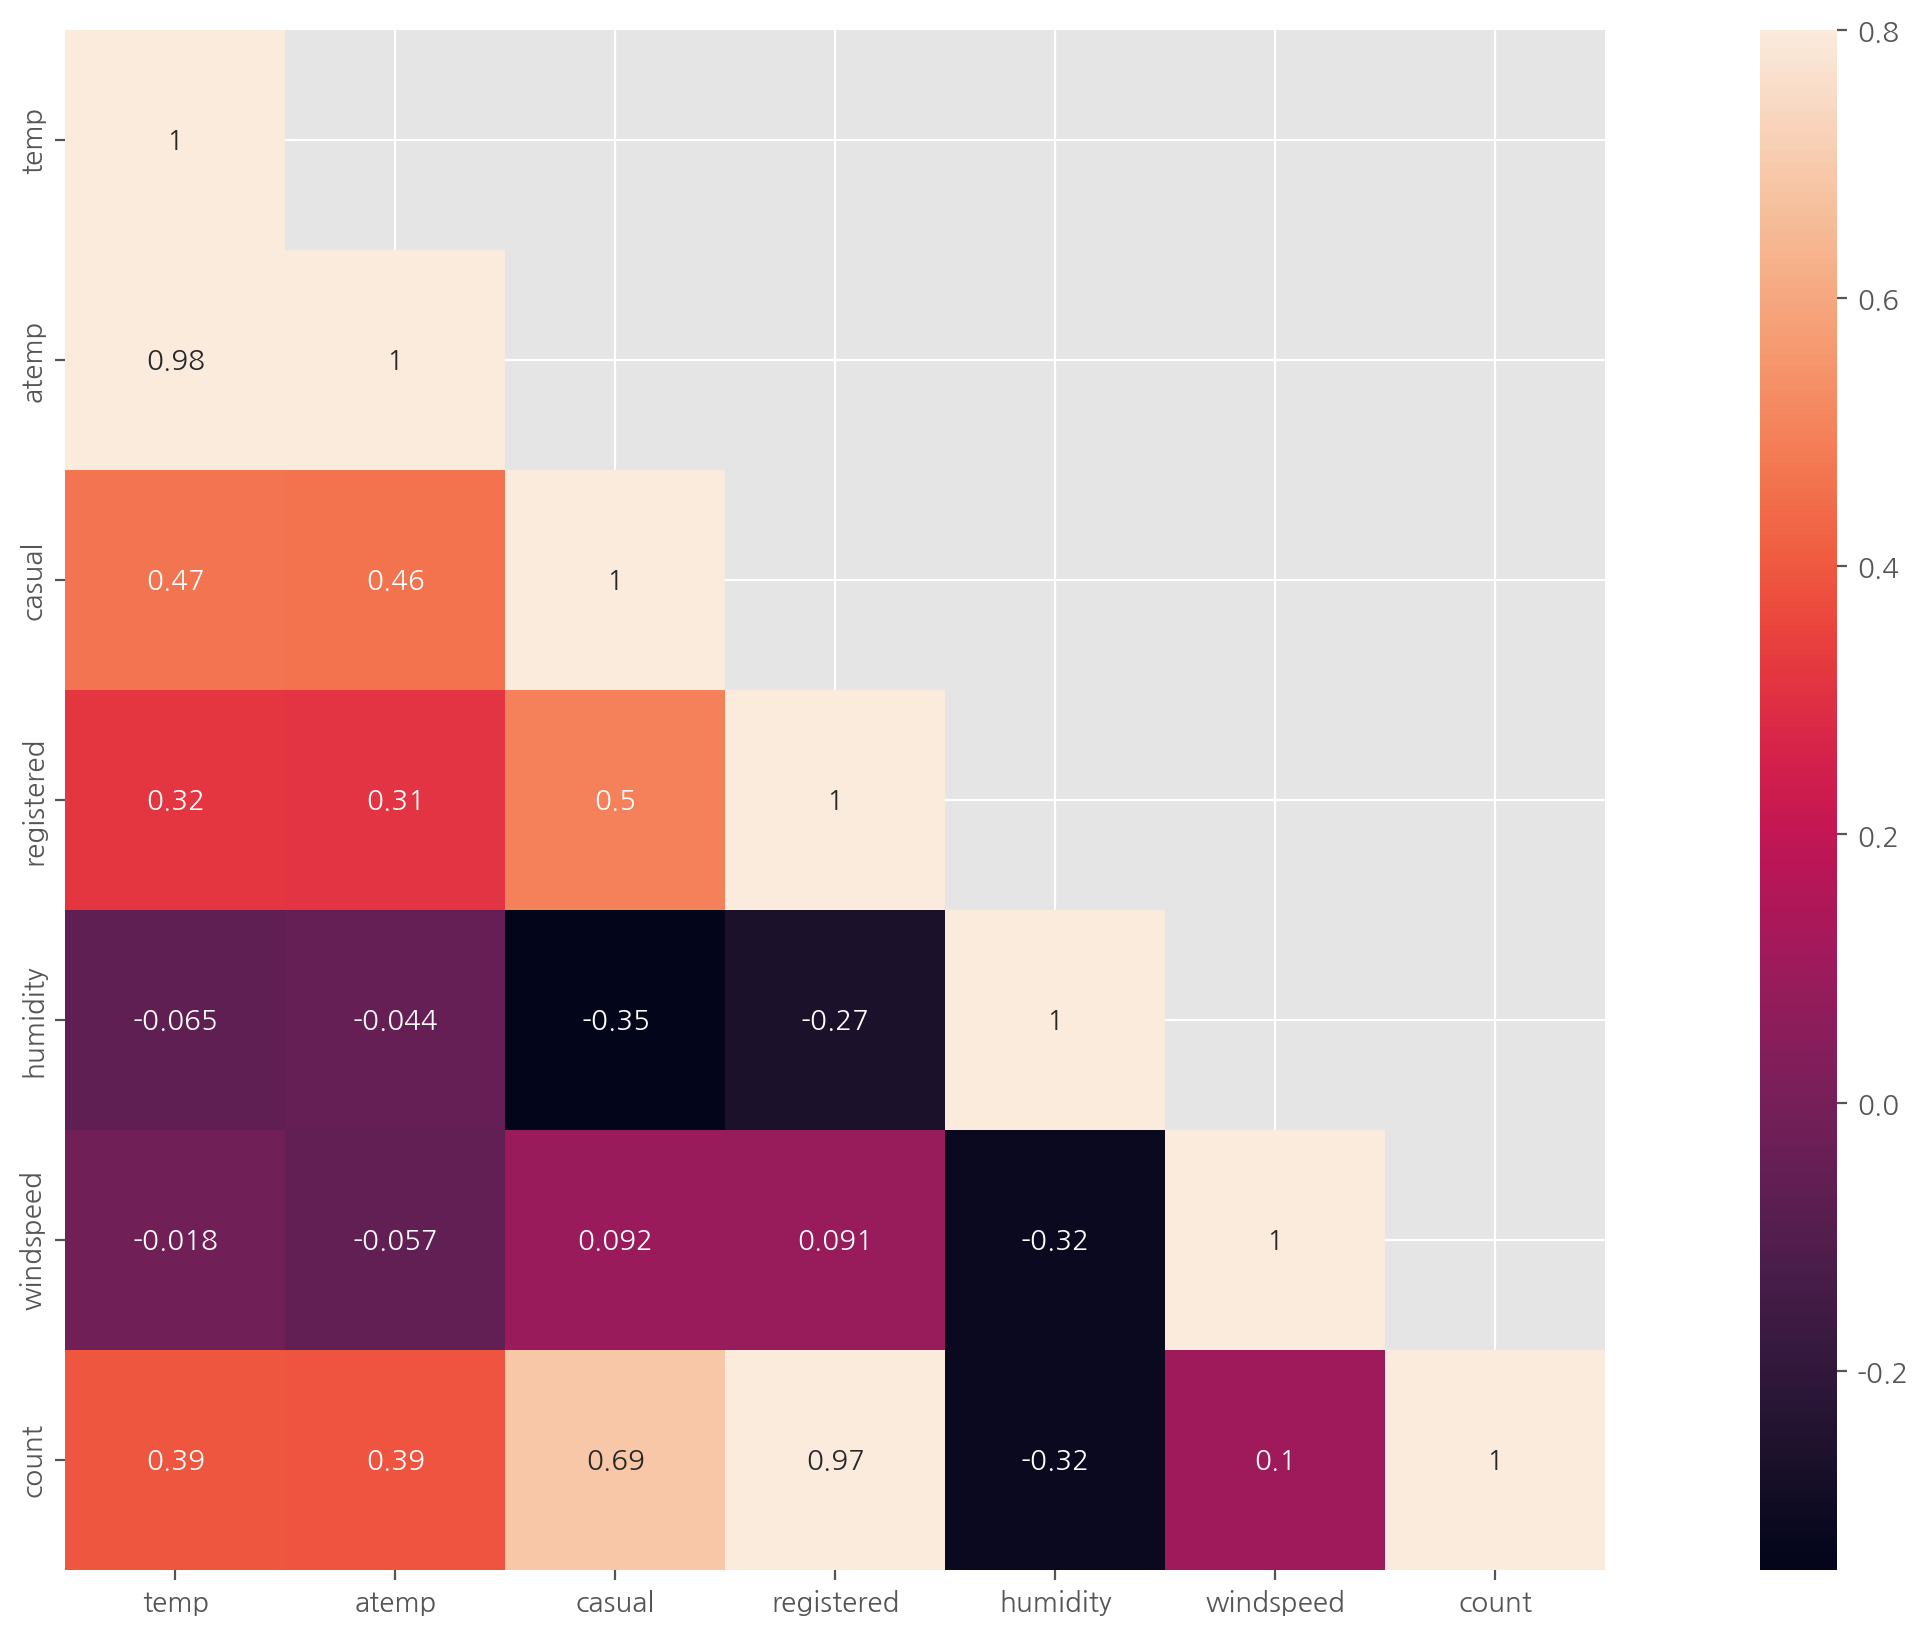

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax = 0.8, square=True, annot=True)

<Axes: xlabel='humidity', ylabel='count'>

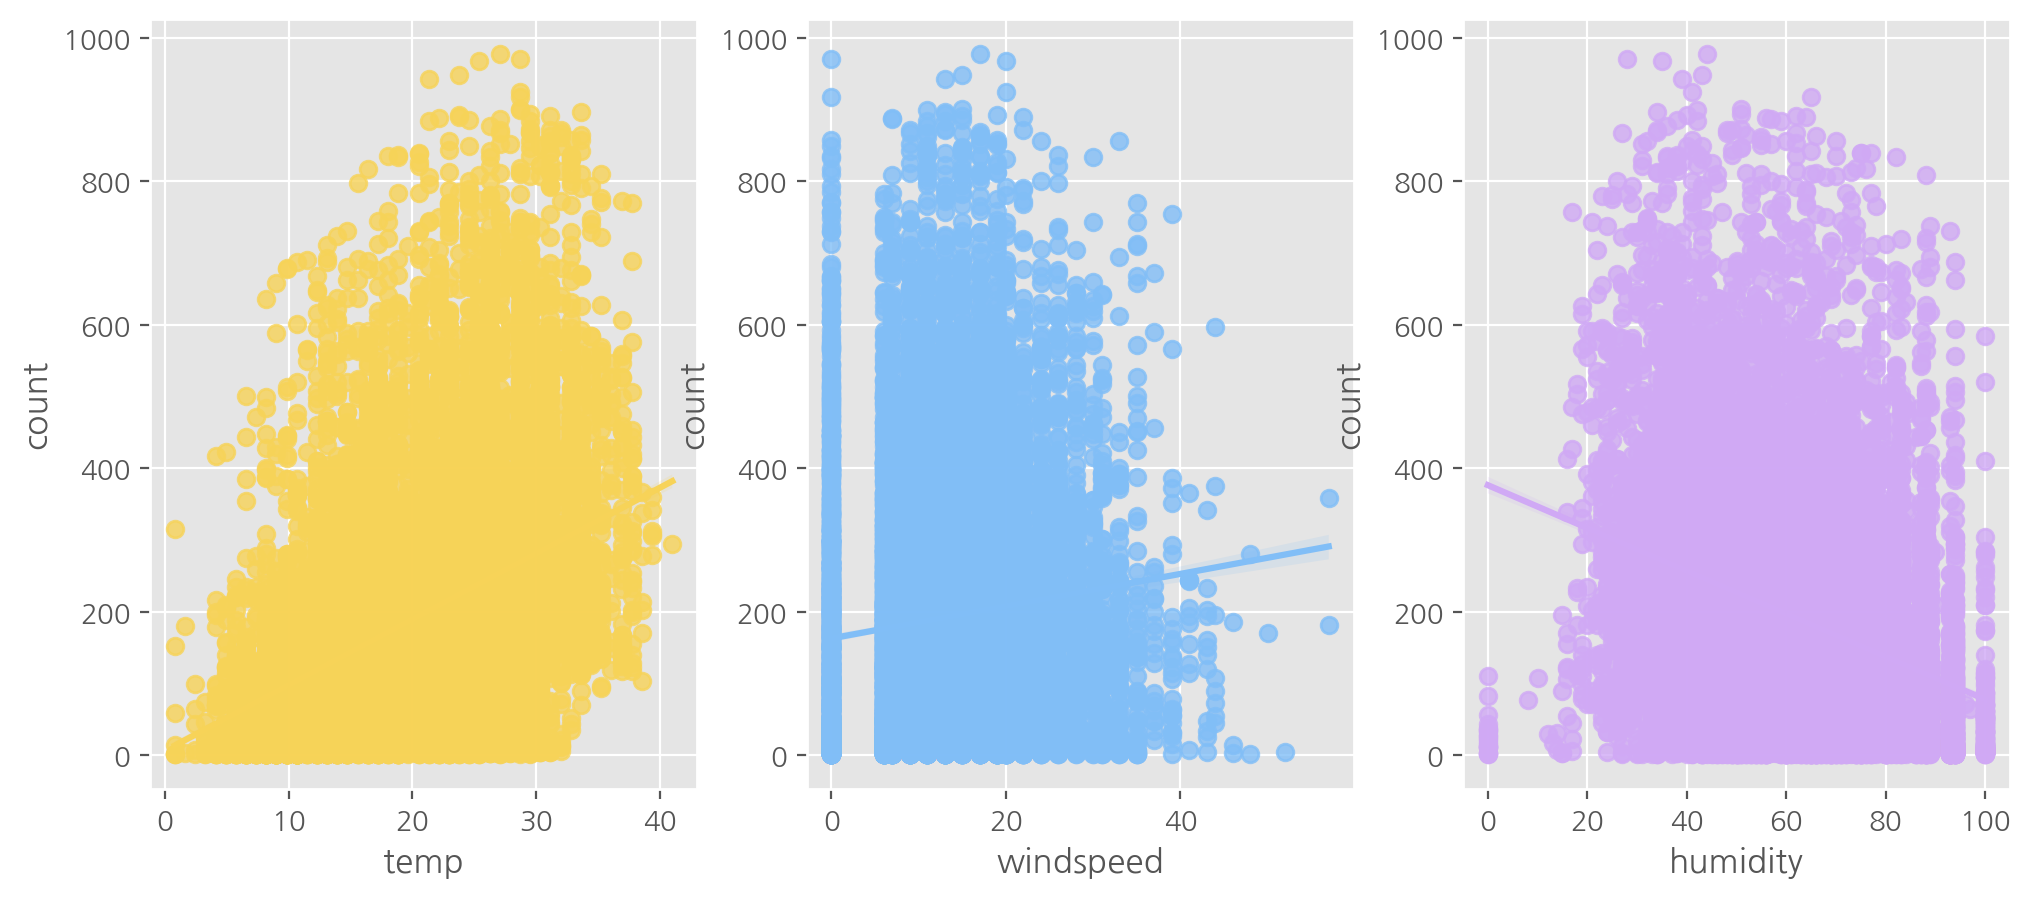

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data = train, ax=ax1, color = "#F7D358")
sns.regplot(x="windspeed", y="count", data=train, ax=ax2, color = "#81BEF7")
sns.regplot(x="humidity", y="count", data=train, ax=ax3, color = "#D0A9F5")

In [ ]:
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)
train["year_month"] = train["datetime"].apply(concatenate_year_month)
print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<ipython-input-28-369e639a5065>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="year", y="count", ax=ax1, palette="coolwarm")
<ipython-input-28-369e639a5065>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="month", y="count", ax=ax2, palette="coolwarm")
<ipython-input-28-369e639a5065>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="year_month", y="count", ax=ax3, palette="coolwarm")


<Axes: xlabel='year_month', ylabel='count'>

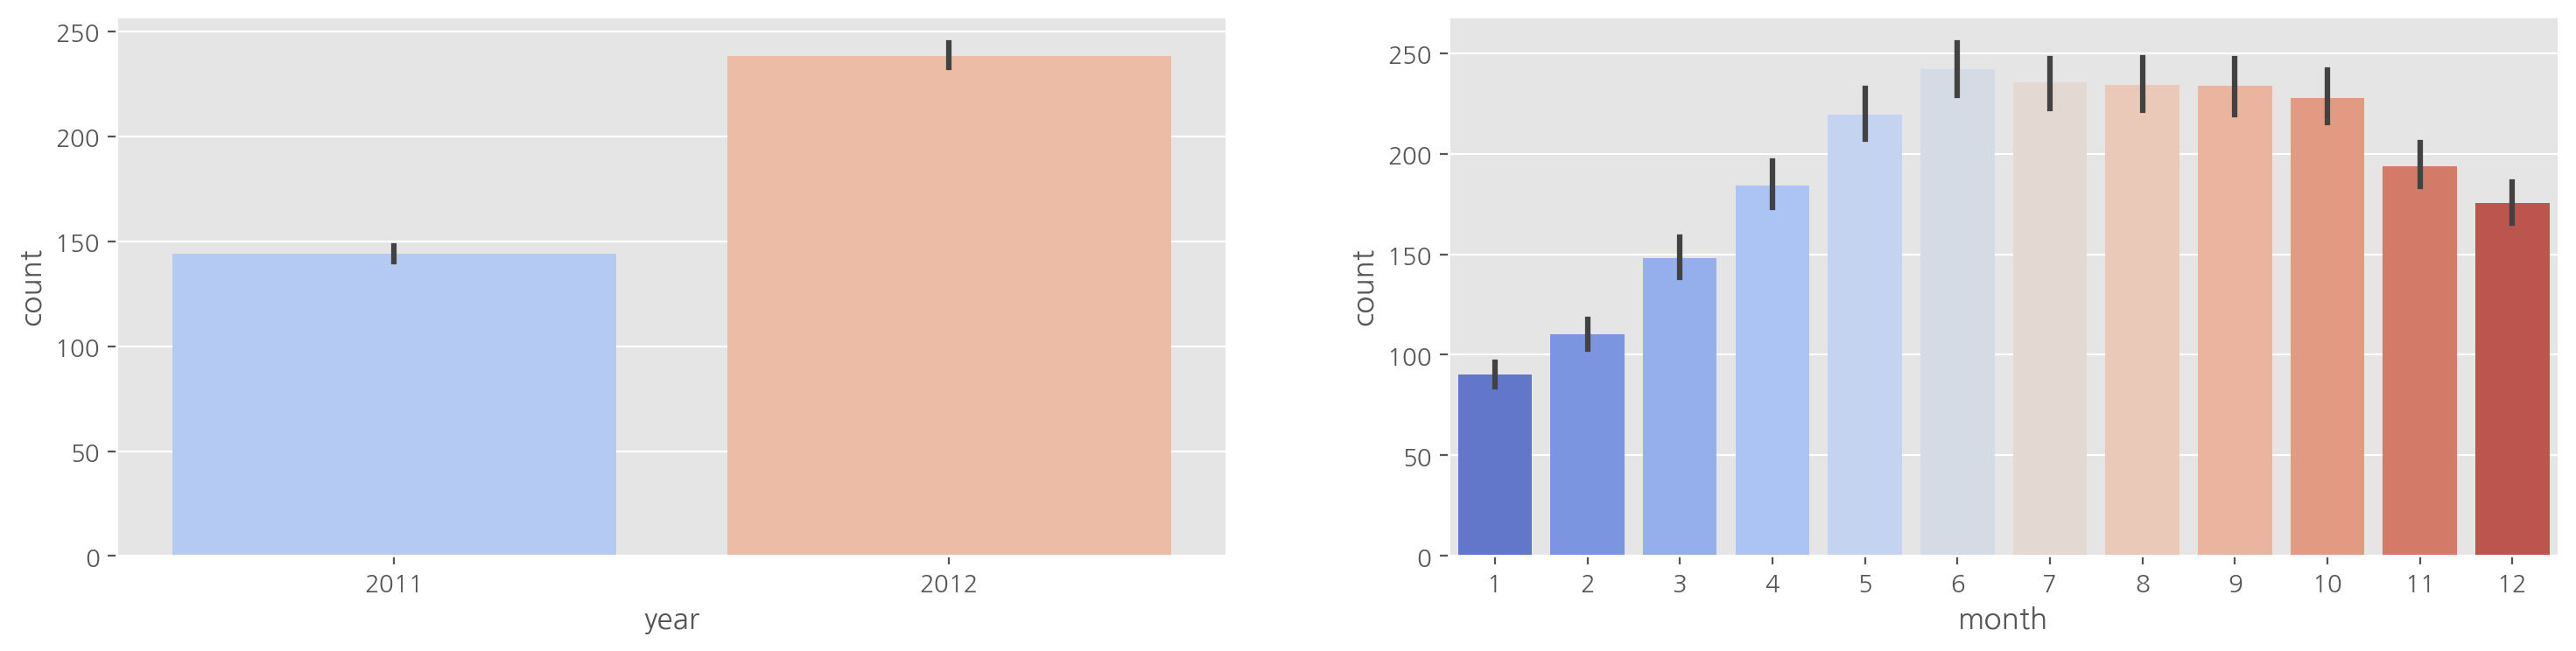

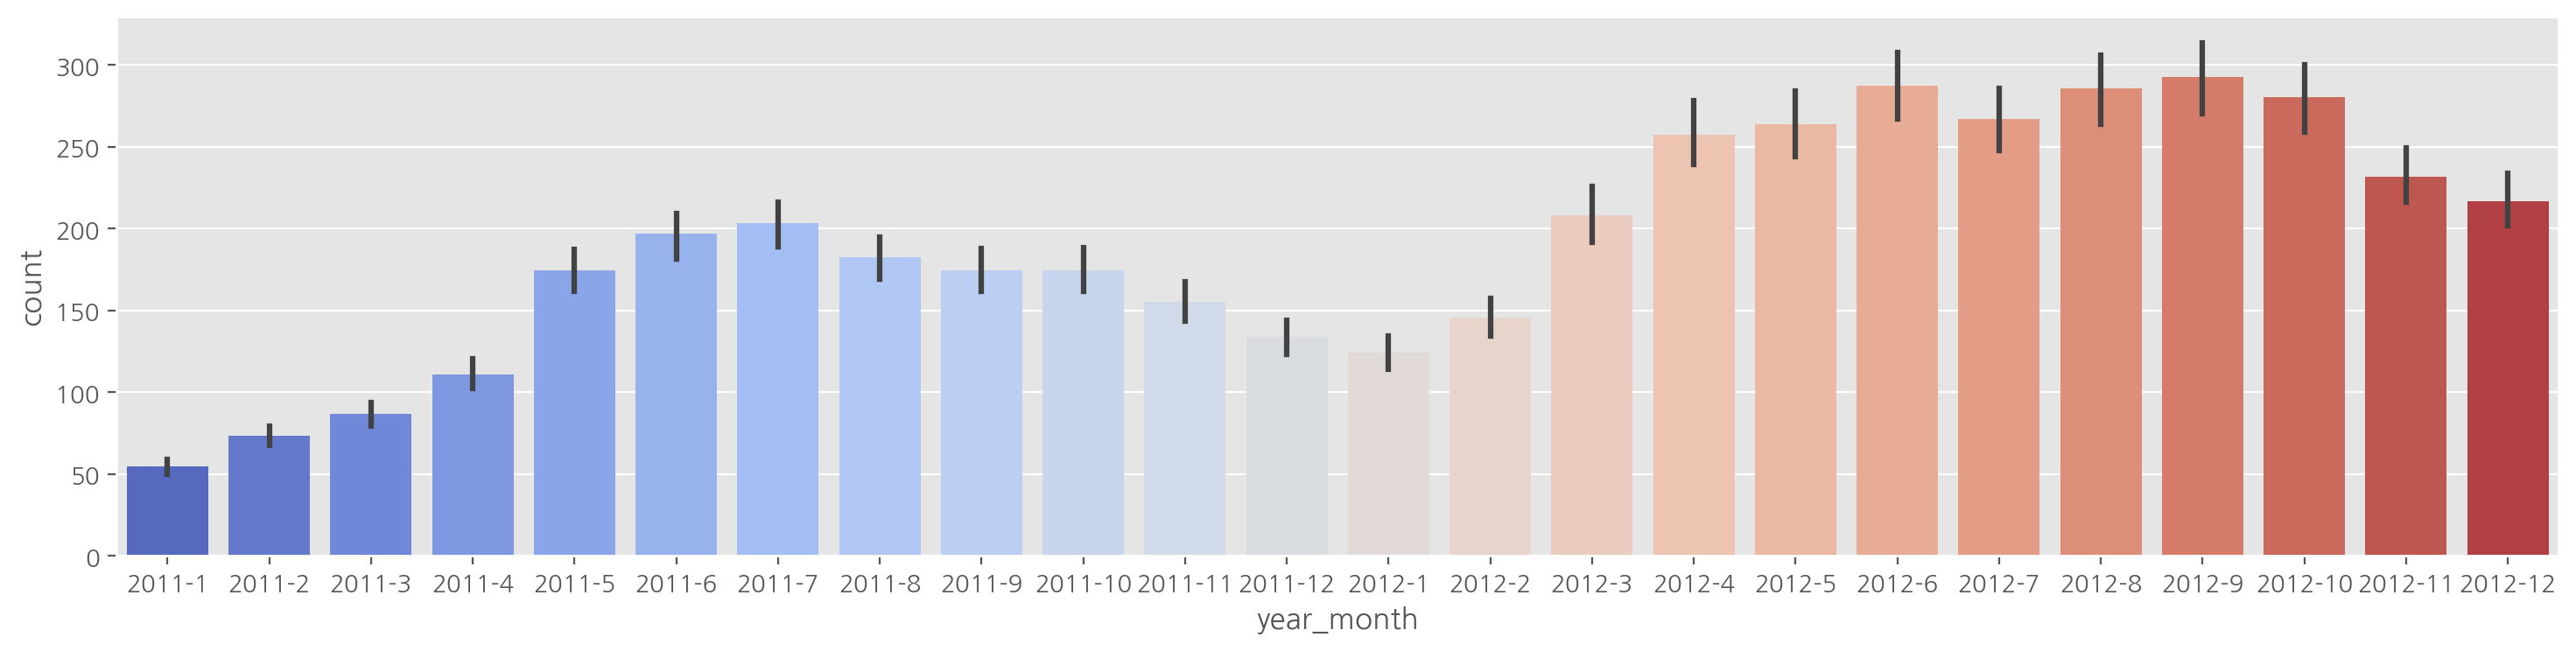

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x="year", y="count", ax=ax1, palette="coolwarm")
sns.barplot(data=train, x="month", y="count", ax=ax2, palette="coolwarm")
fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=train, x="year_month", y="count", ax=ax3, palette="coolwarm")

In [ ]:
trainWithoutOutliers = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


<ipython-input-33-fd6768121850>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"], ax=axes[0][0])
<ipython-input-33-fd6768121850>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

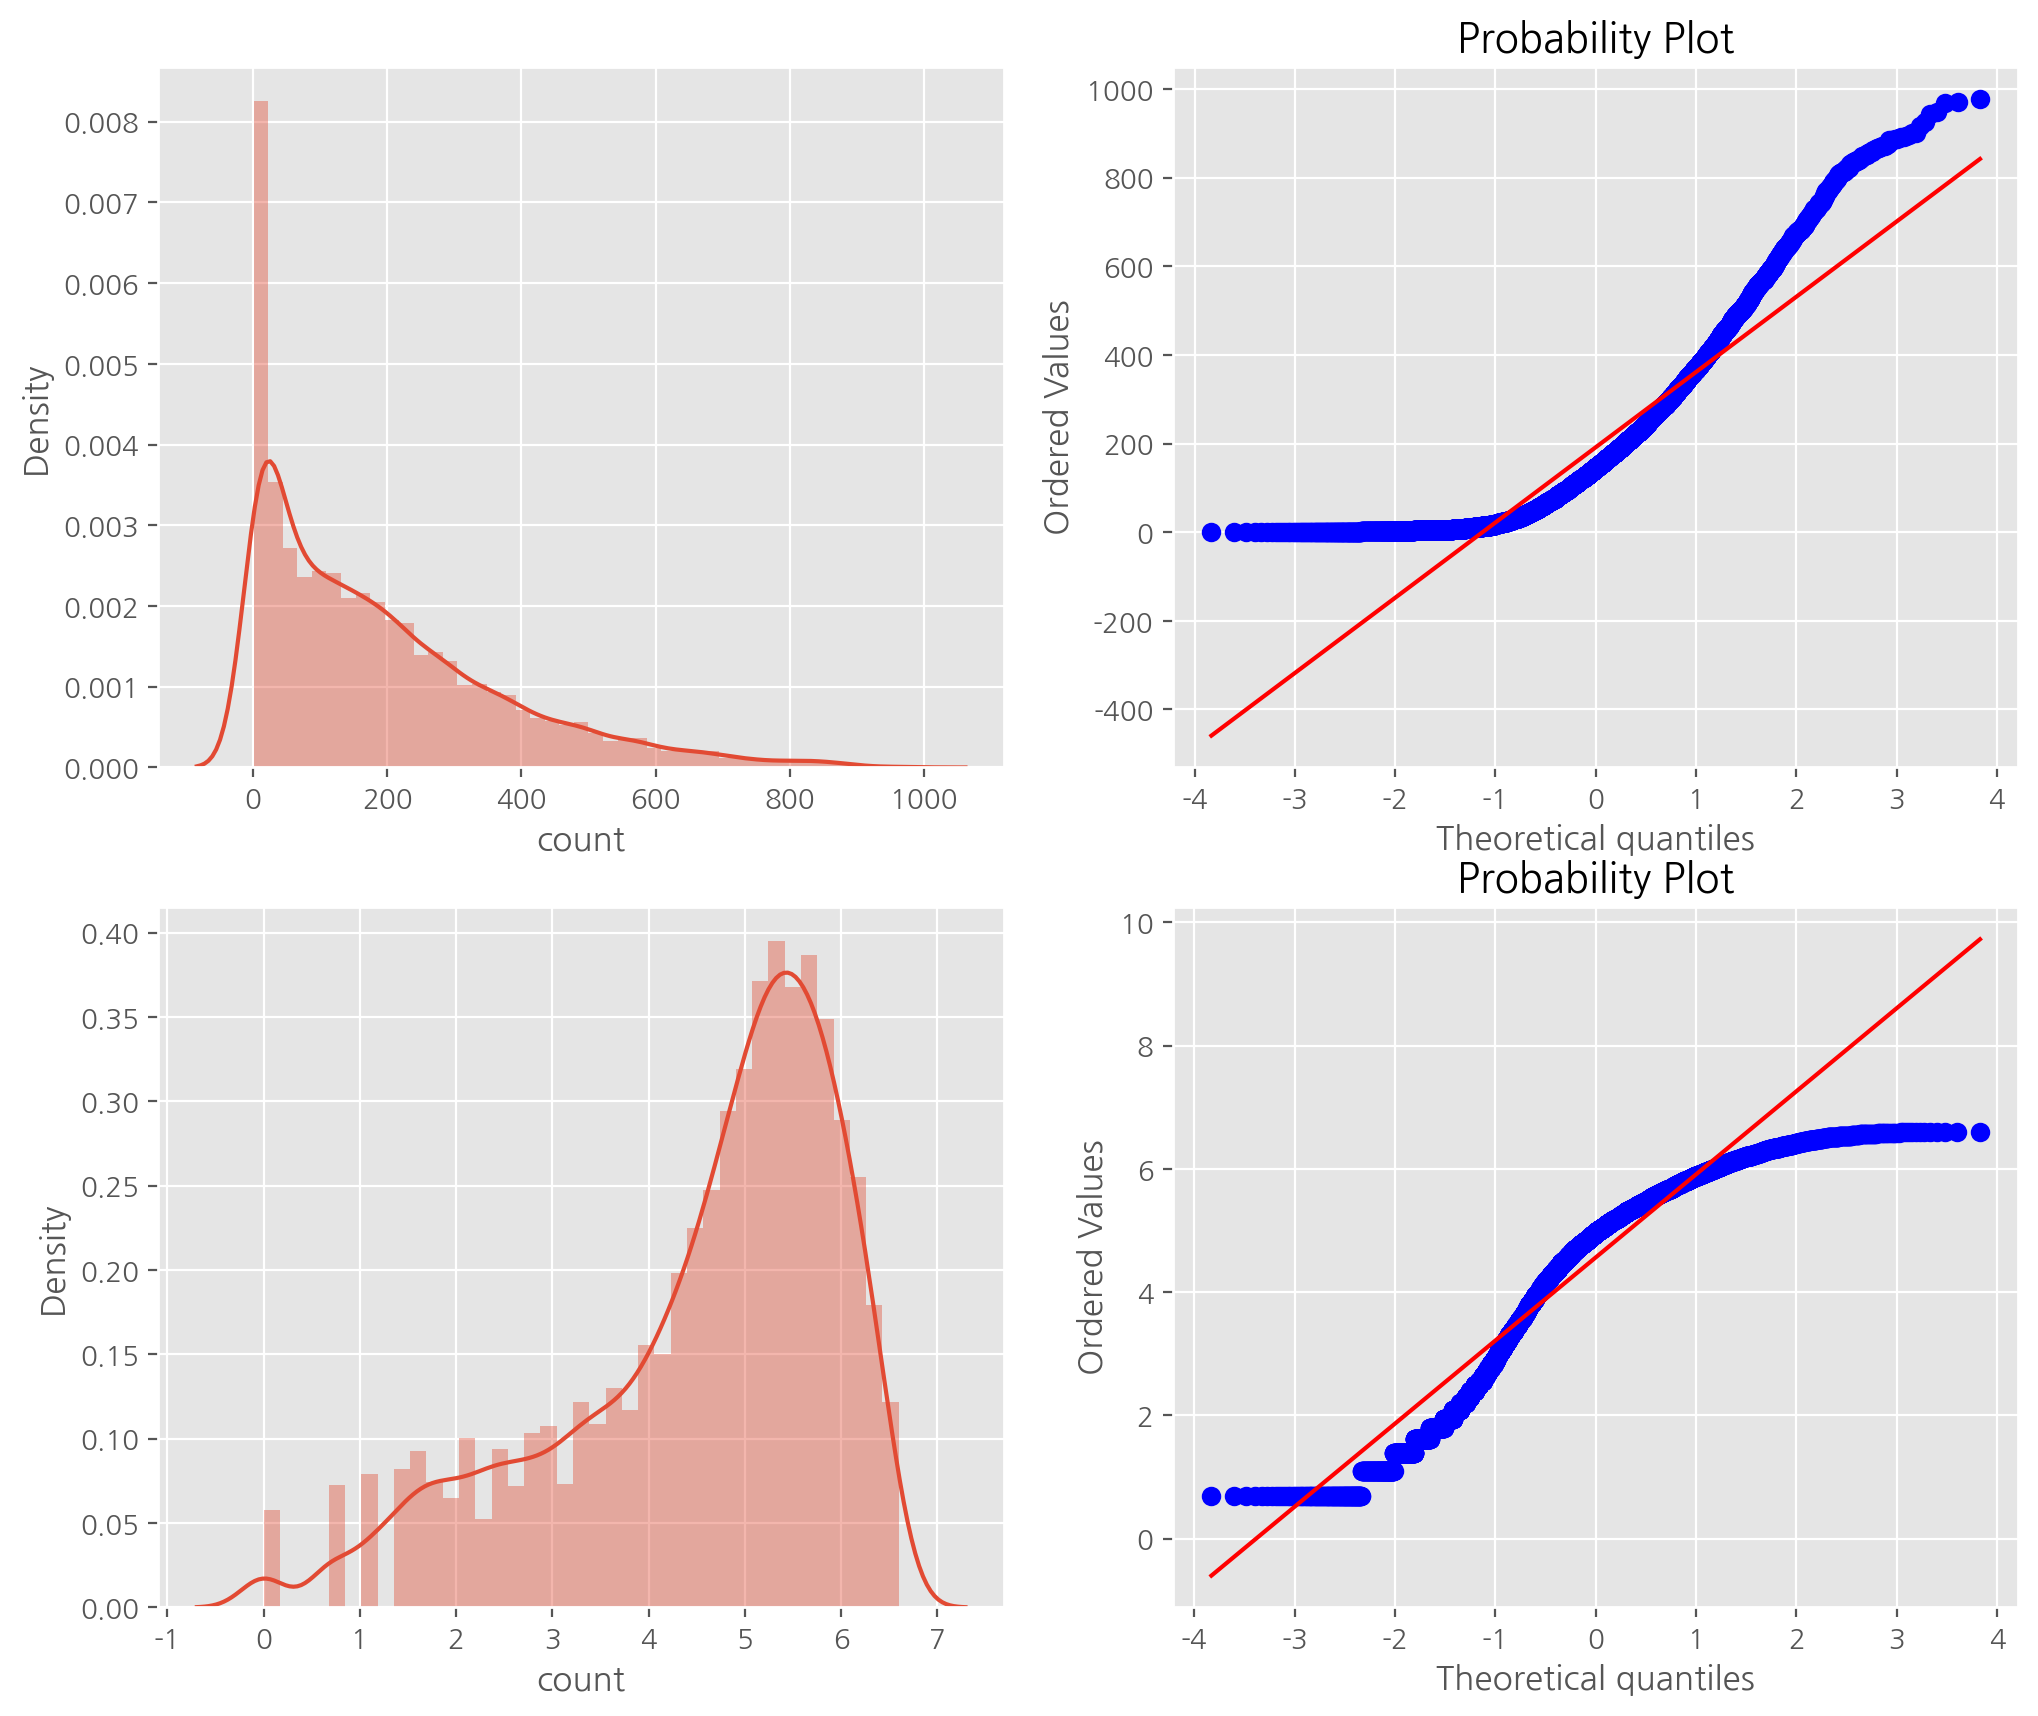

In [ ]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)
sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist="norm", fit = True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = 'norm', fit = True, plot=axes[1][1])